## Cities in Kazakhstan. Data mining

### Introduction

It started when I needed location coordinates for Russian cities. I've found csv with city list and its coordinates. So I decided to create such table for KZ cities.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re as re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Base table

I've found this table in wikipedia. So I will parse this page to mine information for base table

In [2]:
URL = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%9A%D0%B0%D0%B7%D0%B0%D1%85%D1%81%D1%82%D0%B0%D0%BD%D0%B0'

In [3]:
res = requests.get(URL)

In [4]:
soup = BeautifulSoup(res.text,'lxml')

In [5]:
table = soup.find('table', attrs={'class' : 'wikitable'})

In [6]:
content = []

In [7]:
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])

In [8]:
col = [
    'title',
    'rus_title',
    'kz_title',
    'city_from',
    'pop_1979',
    'pop_1989',
    'pop_1999',
    'pop_2009',
    'pop_2014',
    'pop_2019',
    'status',
    'region'
]

In [9]:
cities = pd.DataFrame(content, columns=col)

In [10]:
cities.head()

,title,rus_title,kz_title,city_from,pop_1979,pop_1989,pop_1999,pop_2009,pop_2014,pop_2019,status,region
0,Абай\n,Абай\n,Абай\n,1961\n,39387\n,46533\n,33066\n,25550\n,27954\n,28365\n,4\n,Карагандинская область\n
1,Акколь\n,Акколь\n,АкколАқкөл\n,1965\n,17867\n,19664\n,15682\n,14217\n,13708\n,13676\n,4\n,Акмолинская область\n
2,Аксай\n,Аксай\n,АксайАқсай\n,1967\n,10400\n,18237\n,28953\n,32873\n,33589\n,35310\n,4\n,Западно-Казахстанская область\n
3,Аксу\n,Аксу\n,АксуАқсу\n,1961\n,41572\n,47067\n,42264\n,41677\n,42519\n,41639\n,3\n,Павлодарская область\n
4,Актау\n,Актау\n,АктауАқтау\n,1963\n,110575\n,159245\n,143396\n,166962\n,182033\n,183006\n,2\n,Мангистауская область\n


There is \n in every row. Gonna clear it

In [11]:
for column in col:
    cities[column] = cities[column].str.replace('\n', '')

In [12]:
cities.head()

,title,rus_title,kz_title,city_from,pop_1979,pop_1989,pop_1999,pop_2009,pop_2014,pop_2019,status,region
0,Абай,Абай,Абай,1961,39387,46533,33066,25550,27954,28365,4,Карагандинская область
1,Акколь,Акколь,АкколАқкөл,1965,17867,19664,15682,14217,13708,13676,4,Акмолинская область
2,Аксай,Аксай,АксайАқсай,1967,10400,18237,28953,32873,33589,35310,4,Западно-Казахстанская область
3,Аксу,Аксу,АксуАқсу,1961,41572,47067,42264,41677,42519,41639,3,Павлодарская область
4,Актау,Актау,АктауАқтау,1963,110575,159245,143396,166962,182033,183006,2,Мангистауская область


There is a problem with kz_title column. Some of the city names are duplicated to coherent word. Need to separate them. I will write function which one will check how many uppercased letter are in the word. Based pn it I will separate them

In [13]:
def kz_letters(row):
    i = 0
    exclusions = ['Форт-Шевченко', 'Нұр-Сұлтан'] # this names should be ignored
    length = len(row)//2 #where to start separation
    result = ''
    
    # check how many upercased letters
    for letter in row:
        if row in exclusions:
            result = row
            break
        else:
            if letter.isupper() == True:
                i += 1
        # if more than 1 separate
        if i > 1:
            result = row[length:]
        else:
            result = row
    return result

In [14]:
cities['kz_title'] = cities['kz_title'].apply(kz_letters)

In [15]:
cities.head()

,title,rus_title,kz_title,city_from,pop_1979,pop_1989,pop_1999,pop_2009,pop_2014,pop_2019,status,region
0,Абай,Абай,Абай,1961,39387,46533,33066,25550,27954,28365,4,Карагандинская область
1,Акколь,Акколь,Ақкөл,1965,17867,19664,15682,14217,13708,13676,4,Акмолинская область
2,Аксай,Аксай,Ақсай,1967,10400,18237,28953,32873,33589,35310,4,Западно-Казахстанская область
3,Аксу,Аксу,Ақсу,1961,41572,47067,42264,41677,42519,41639,3,Павлодарская область
4,Актау,Актау,Ақтау,1963,110575,159245,143396,166962,182033,183006,2,Мангистауская область


Now the city names are correct. Dtypes I will corerct in the end. Bust first need to fill '' values with nan

In [16]:
cities = cities.replace('', np.nan)

In [17]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      88 non-null     object
 1   rus_title  88 non-null     object
 2   kz_title   88 non-null     object
 3   city_from  88 non-null     object
 4   pop_1979   44 non-null     object
 5   pop_1989   62 non-null     object
 6   pop_1999   88 non-null     object
 7   pop_2009   88 non-null     object
 8   pop_2014   88 non-null     object
 9   pop_2019   88 non-null     object
 10  status     88 non-null     object
 11  region     88 non-null     object
dtypes: object(12)
memory usage: 8.4+ KB


Base table is ready. Now I want to add a bit more information like area, altitude, zip-code, carcodes and coordinates

### Additional inforamtion

Gonna create list of the links for all cities from dataset

In [18]:
links = []

In [19]:
for row in table.find_all('tr'):
    if not row.find_all('th'):
        links.append([element['href'] for element in row.find_all('a')])

In [20]:
links[0][0]

'/wiki/%D0%90%D0%B1%D0%B0%D0%B9_(%D0%90%D0%B1%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD)'

First item of the each row is a link I need

In [21]:
len(links)

88

In [22]:
city_list = cities['title']

Now using the links I will get necessary information from infoboxes from wiki-pages for each city. Each column I will perform in separated loops. Of course it will take much more time, but there is no another way (or I don't know it) cause some information for some cities could be missed, so rows could be shifted

In [23]:
city_area = []

In [24]:
%%time
for i in range(len(links)):
    temp_table = []
    temp_table.append(city_list[i])
    url_temp = 'https://ru.wikipedia.org'+links[i][0]
    res_temp = requests.get(url_temp)
    soup_temp = BeautifulSoup(res_temp.text,'lxml')
    table_temp = soup_temp.find('table', attrs={'class' : 'infobox'})
    for row in table_temp.find_all('td'):
        area = row.find('span', attrs={'data-wikidata-property-id': 'P2046'})
        if area != None:
            temp_table.append(area.text)
    city_area.append(temp_table)

Wall time: 47.8 s


In [25]:
city_area[0]

['Абай', '200 км²']

In [26]:
city_altitude = []

In [27]:
%%time
for i in range(len(links)):
    temp_table = []
    temp_table.append(city_list[i])
    url_temp = 'https://ru.wikipedia.org'+links[i][0]
    res_temp = requests.get(url_temp)
    soup_temp = BeautifulSoup(res_temp.text,'lxml')
    table_temp = soup_temp.find('table', attrs={'class' : 'infobox'})
    for row in table_temp.find_all('td'):
        altitude = row.find('span', attrs={'data-wikidata-property-id': 'P2044'})
        if altitude != None:
            temp_table.append(altitude.text)
    city_altitude.append(temp_table)

Wall time: 35.7 s


In [28]:
city_altitude[0]

['Абай', '504 м']

In [29]:
city_timezone = []

In [30]:
%%time
for i in range(len(links)):
    temp_table = []
    temp_table.append(city_list[i])
    url_temp = 'https://ru.wikipedia.org'+links[i][0]
    res_temp = requests.get(url_temp)
    soup_temp = BeautifulSoup(res_temp.text,'lxml')
    table_temp = soup_temp.find('table', attrs={'class' : 'infobox'})
    for row in table_temp.find_all('td'):
        timezone = row.find('span', attrs={'data-wikidata-property-id': 'P421'})
        if timezone != None:
            temp_table.append(timezone.text)
    city_timezone.append(temp_table)

Wall time: 32.6 s


In [31]:
city_timezone[0]

['Абай', 'UTC+6:00']

In [32]:
city_zipcode = []

In [33]:
%%time
for i in range(len(links)):
    temp_table = []
    temp_table.append(city_list[i])
    url_temp = 'https://ru.wikipedia.org'+links[i][0]
    res_temp = requests.get(url_temp)
    soup_temp = BeautifulSoup(res_temp.text,'lxml')
    table_temp = soup_temp.find('table', attrs={'class' : 'infobox'})
    for row in table_temp.find_all('td'):
        zipcode = row.find('span', attrs={'data-wikidata-property-id': 'P281'})
        if zipcode != None:
            temp_table.append(zipcode.text)
    city_zipcode.append(temp_table)

Wall time: 32.1 s


In [34]:
city_zipcode[0]

['Абай', '100100, 100101']

In [35]:
city_current_pop = []

In [36]:
%%time
for i in range(len(links)):
    temp_table = []
    temp_table.append(city_list[i])
    url_temp = 'https://ru.wikipedia.org'+links[i][0]
    res_temp = requests.get(url_temp)
    soup_temp = BeautifulSoup(res_temp.text,'lxml')
    table_temp = soup_temp.find('table', attrs={'class' : 'infobox'})
    for row in table_temp.find_all('td'):
        pop = row.find('span', attrs={'data-wikidata-property-id': 'P1082'})
        if pop != None:
            temp_table.append(pop.text)
    city_current_pop.append(temp_table)

Wall time: 42.2 s


In [37]:
city_current_pop[0]

['Абай', '28\xa0363[1]\xa0человека (2019)']

Now from created lists I will create datasets and merge them with base table

In [38]:
area_df = pd.DataFrame(city_area, columns=['title', 'area'])

In [39]:
cities = cities.merge(area_df, on='title')

In [40]:
altitude_df = pd.DataFrame(city_altitude, columns=['title', 'altitude'])

In [41]:
cities = cities.merge(altitude_df, on='title')

In [42]:
timezone_df = pd.DataFrame(city_timezone, columns=['title', 'timezone'])

In [43]:
cities = cities.merge(timezone_df, on='title')

In [44]:
zipcode_df = pd.DataFrame(city_zipcode, columns=['title', 'zipcode'])

In [45]:
cities = cities.merge(zipcode_df, on='title')

In [46]:
city_current_pop_df = pd.DataFrame(city_current_pop, columns=['title', 'current_pop'])

In [47]:
cities = cities.merge(city_current_pop_df, on='title')

Probably it could be done by some loop but I didn't get how to make this loop

In [48]:
cities.head()

,title,rus_title,kz_title,city_from,pop_1979,pop_1989,pop_1999,pop_2009,pop_2014,pop_2019,status,region,area,altitude,timezone,zipcode,current_pop
0,Абай,Абай,Абай,1961,39387,46533,33066,25550,27954,28365,4,Карагандинская область,200 км²,504 м,UTC+6:00,"100100, 100101",28 363[1] человека (2019)
1,Акколь,Акколь,Ақкөл,1965,17867,19664,15682,14217,13708,13676,4,Акмолинская область,9400 км²,364 м,UTC+6:00,020100,13 678[1] человек (2019)
2,Аксай,Аксай,Ақсай,1967,10400,18237,28953,32873,33589,35310,4,Западно-Казахстанская область,None,None,UTC+5:00,090300 — 090302,35 310[1] человек (2019)
3,Аксу,Аксу,Ақсу,1961,41572,47067,42264,41677,42519,41639,3,Павлодарская область,"8,08966 км²",None,UTC+6:00,140100—140104,41 625[1] человек (2019)
4,Актау,Актау,Ақтау,1963,110575,159245,143396,166962,182033,183006,2,Мангистауская область,"76,48 (городской акимат) км²",−8 м,UTC+5:00,130000,&&&&&&&&&0193494.&&&&&0193 494[1] человека (2020)


Same for coordinates

In [49]:
data_lat = []

In [50]:
%%time
for i in range(len(links)):
    temp_table = []
    temp_table.append(city_list[i])
    url_temp = 'https://ru.wikipedia.org'+links[i][0]
    res_temp = requests.get(url_temp)
    soup_temp = BeautifulSoup(res_temp.text,'lxml')
    table_temp = soup_temp.find('table', attrs={'class' : 'infobox'})
    for row in table_temp.find_all('td'):
        lat = row.find_all('a', attrs={'class' : 'mw-kartographer-maplink'})
        if lat != []:
            temp_table.append(lat[0]['data-lat'])
            temp_table.append(lat[0]['data-lon'])
    data_lat.append(temp_table)

Wall time: 31.9 s


In [51]:
coord_df = pd.DataFrame(data_lat, columns=['title', 'lat', 'lon'])

In [52]:
cities = cities.merge(coord_df, on='title')

In [53]:
cities.head()

,title,rus_title,kz_title,city_from,pop_1979,pop_1989,pop_1999,pop_2009,pop_2014,pop_2019,status,region,area,altitude,timezone,zipcode,current_pop,lat,lon
0,Абай,Абай,Абай,1961,39387,46533,33066,25550,27954,28365,4,Карагандинская область,200 км²,504 м,UTC+6:00,"100100, 100101",28 363[1] человека (2019),49.63333,72.85
1,Акколь,Акколь,Ақкөл,1965,17867,19664,15682,14217,13708,13676,4,Акмолинская область,9400 км²,364 м,UTC+6:00,020100,13 678[1] человек (2019),52,70.93333
2,Аксай,Аксай,Ақсай,1967,10400,18237,28953,32873,33589,35310,4,Западно-Казахстанская область,None,None,UTC+5:00,090300 — 090302,35 310[1] человек (2019),51.16778,52.995
3,Аксу,Аксу,Ақсу,1961,41572,47067,42264,41677,42519,41639,3,Павлодарская область,"8,08966 км²",None,UTC+6:00,140100—140104,41 625[1] человек (2019),52.03333,76.91667
4,Актау,Актау,Ақтау,1963,110575,159245,143396,166962,182033,183006,2,Мангистауская область,"76,48 (городской акимат) км²",−8 м,UTC+5:00,130000,&&&&&&&&&0193494.&&&&&0193 494[1] человека (2020),43.65,51.15


In [54]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        88 non-null     object
 1   rus_title    88 non-null     object
 2   kz_title     88 non-null     object
 3   city_from    88 non-null     object
 4   pop_1979     44 non-null     object
 5   pop_1989     62 non-null     object
 6   pop_1999     88 non-null     object
 7   pop_2009     88 non-null     object
 8   pop_2014     88 non-null     object
 9   pop_2019     88 non-null     object
 10  status       88 non-null     object
 11  region       88 non-null     object
 12  area         51 non-null     object
 13  altitude     38 non-null     object
 14  timezone     86 non-null     object
 15  zipcode      87 non-null     object
 16  current_pop  88 non-null     object
 17  lat          88 non-null     object
 18  lon          88 non-null     object
dtypes: object(19)
memory usage: 13.

### Preprocessing

As you can see there are a lot of waste info in rows. Gonna try to work it out

First will be area column

In [55]:
cities['area'] = cities['area'].str.replace(',' , '.') #replcaing the comas to dots

In [56]:
cities['area'] = cities['area'].str.replace(u'\xa0' , u' ') #replcaing this space to normal one

In [57]:
cities['area'] = cities['area'].str.replace(' ' , '') #replcaing the spaces to nothing

In [58]:
cities['area'] = cities['area'].str.lower() #changing to lowercase

In [59]:
cities['area'].unique()

array(['200км²', '9400км²', None, '8.08966км²',
       '76.48(городскойакимат)км²', '428.469[1]км²', '682[1]км²', '10км²',
       '797.33[1]км²', '68.7км²', '160.73[1]км²', '54.98[3]км²', '230км²',
       '47.3км²', '51.5га', '7.3км²', '56.03км²',
       '279(собственногород)498(городскойакимат)[2]км²', '12662км²',
       '71.04(вграницахгорода[1]);77.45(вграницахгородскогоакимата.июнь2018[2])км²',
       '233.97(вграницахгорода)[4];га-425(вграницахакимата)[5]км²',
       '247км²', '110км²', '240км²', '20.47км²', '0.1тыс.[1]км²',
       '632[2]км²', '224.9км²', '54.5км²', '77.52[2]км²', '193.13[2]км²',
       '174км²', '28.5км²', '210км²', '25.74км²', '158.36[2]км²',
       '18.8км²', '74км²', '187.87[1]км²', '296.1км²', '25.7[2]км²',
       '196.27[2]км²', '209.83[2]км²', '540[2]км²', '279.56км²',
       '4.8тыс.км²', '20км²', '1162.8[4]км²', '188км²'], dtype=object)

Different units for area could cause the problems. I will create special columns with units

In [60]:
def units_define(text):
    if text != None:
        if 'тыс.' in text:
            return 'тыс. км²'
        else:
            if 'км²' in text:
                return 'км²'
            else:
                if 'га' in text:
                    return 'га'
                else:
                    return None
    else:
        return None

In [61]:
cities['area_units'] = cities['area'].apply(units_define)

In [62]:
cities['area_units'].unique()

array(['км²', None, 'га', 'тыс. км²'], dtype=object)

Now I will take clear figures from cells using function below

In [63]:
def find_number(text):
    number = []
    if text != None:
        for letter in text:
            if letter in ['k', '(', '[', 'к', 'г', 'т', 'м', ';']:
                break
            else:
                number.append(letter)
    return ''.join(number)

In [64]:
print(find_number('76.48(городскойакимат)км²')) #checking

76.48


In [65]:
cities['area'] = cities['area'].apply(lambda x: find_number(x))

In [66]:
cities.head()

,title,rus_title,kz_title,city_from,pop_1979,pop_1989,pop_1999,pop_2009,pop_2014,pop_2019,status,region,area,altitude,timezone,zipcode,current_pop,lat,lon,area_units
0,Абай,Абай,Абай,1961,39387,46533,33066,25550,27954,28365,4,Карагандинская область,200,504 м,UTC+6:00,"100100, 100101",28 363[1] человека (2019),49.63333,72.85,км²
1,Акколь,Акколь,Ақкөл,1965,17867,19664,15682,14217,13708,13676,4,Акмолинская область,9400,364 м,UTC+6:00,020100,13 678[1] человек (2019),52,70.93333,км²
2,Аксай,Аксай,Ақсай,1967,10400,18237,28953,32873,33589,35310,4,Западно-Казахстанская область,,None,UTC+5:00,090300 — 090302,35 310[1] человек (2019),51.16778,52.995,None
3,Аксу,Аксу,Ақсу,1961,41572,47067,42264,41677,42519,41639,3,Павлодарская область,8.08966,None,UTC+6:00,140100—140104,41 625[1] человек (2019),52.03333,76.91667,км²
4,Актау,Актау,Ақтау,1963,110575,159245,143396,166962,182033,183006,2,Мангистауская область,76.48,−8 м,UTC+5:00,130000,&&&&&&&&&0193494.&&&&&0193 494[1] человека (2020),43.65,51.15,км²


Now I need to fill empty cells with nan to be able to change the type of the data

In [67]:
cities['area'] = cities['area'].replace('', np.nan)

In [68]:
cities['area'] = cities['area'].astype('float64')

Now I will write the function wich one will change area to square km based on the area_units column

In [69]:
cities['area_units'].unique()

array(['км²', None, 'га', 'тыс. км²'], dtype=object)

In [70]:
def square_m(amount, ref):
    if ref == 'га':
        return amount/100
    elif ref == 'тыс. км²':
        return amount*1000
    else:
        return amount

In [71]:
print(square_m(np.nan, None))

nan


In [72]:
cities['area'] = cities.apply(lambda x: square_m(x['area'], x['area_units']), axis=1)

In [73]:
cities.head()

,title,rus_title,kz_title,city_from,pop_1979,pop_1989,pop_1999,pop_2009,pop_2014,pop_2019,status,region,area,altitude,timezone,zipcode,current_pop,lat,lon,area_units
0,Абай,Абай,Абай,1961,39387,46533,33066,25550,27954,28365,4,Карагандинская область,200.00000,504 м,UTC+6:00,"100100, 100101",28 363[1] человека (2019),49.63333,72.85,км²
1,Акколь,Акколь,Ақкөл,1965,17867,19664,15682,14217,13708,13676,4,Акмолинская область,9400.00000,364 м,UTC+6:00,020100,13 678[1] человек (2019),52,70.93333,км²
2,Аксай,Аксай,Ақсай,1967,10400,18237,28953,32873,33589,35310,4,Западно-Казахстанская область,NaN,None,UTC+5:00,090300 — 090302,35 310[1] человек (2019),51.16778,52.995,None
3,Аксу,Аксу,Ақсу,1961,41572,47067,42264,41677,42519,41639,3,Павлодарская область,8.08966,None,UTC+6:00,140100—140104,41 625[1] человек (2019),52.03333,76.91667,км²
4,Актау,Актау,Ақтау,1963,110575,159245,143396,166962,182033,183006,2,Мангистауская область,76.48000,−8 м,UTC+5:00,130000,&&&&&&&&&0193494.&&&&&0193 494[1] человека (2020),43.65,51.15,км²


Now altitude using the same logic

In [74]:
cities['altitude'].unique()

array(['504 м', '364 м', None, '−8\xa0м', '225[2] м', '270\xa0м',
       '785\xa0м', '347\xa0± 1\xa0м', '290 м', '−20\xa0м', '654 м',
       '100 м', '440\xa0± 1\xa0м', '262 м', '1214\xa0± 1\xa0м',
       '171\xa0м', '300 м', '660\xa0± 1\xa0м', '480—600 м', '553 м',
       '815 м', '234 м', '157 м', '128\xa0± 1\xa0м', '123\xa0± 1\xa0м',
       '137\xa0± 1\xa0м', '744 м', '206\xa0м', '973 м', '600\xa0± 1\xa0м',
       '610\xa0± 1\xa0м', '1 300 м', '190 м', '35\xa0± 1\xa0м',
       '283\xa0± 1\xa0м', '25\xa0м', '506 м', '395 м'], dtype=object)

In [75]:
cities['altitude'] = cities['altitude'].str.replace(u'\xa0' , u' ') #replcaing this space to normal one

In [76]:
cities['altitude'] = cities['altitude'].str.replace(' ± 1' , '') #replcaing +/-

In [77]:
cities['altitude'] = cities['altitude'].str.replace(' ' , '') #replcaing spaces

In [78]:
cities['altitude'] = cities['altitude'].apply(find_number)

In [79]:
cities['altitude'].unique()

array(['504', '364', '', '−8', '225', '270', '785', '347', '290', '−20',
       '654', '100', '440', '262', '1214', '171', '300', '660', '480—600',
       '553', '815', '234', '157', '128', '123', '137', '744', '206',
       '973', '600', '610', '1300', '190', '35', '283', '25', '506',
       '395'], dtype=object)

480-600 I will fill with mean 540

In [80]:
cities['altitude'] = cities['altitude'].str.replace('480—600' , '540')

In [81]:
cities['altitude'].unique()

array(['504', '364', '', '−8', '225', '270', '785', '347', '290', '−20',
       '654', '100', '440', '262', '1214', '171', '300', '660', '540',
       '553', '815', '234', '157', '128', '123', '137', '744', '206',
       '973', '600', '610', '1300', '190', '35', '283', '25', '506',
       '395'], dtype=object)

In [82]:
cities['altitude'] = cities['altitude'].replace('', np.nan)

In [83]:
cities['altitude'].unique()

array(['504', '364', nan, '−8', '225', '270', '785', '347', '290', '−20',
       '654', '100', '440', '262', '1214', '171', '300', '660', '540',
       '553', '815', '234', '157', '128', '123', '137', '744', '206',
       '973', '600', '610', '1300', '190', '35', '283', '25', '506',
       '395'], dtype=object)

Since I have just two negative values I will change them manually. I couldn't get why astype method is not working with them. Probably it is because of dash. But even when I change it to short one it is not working

In [84]:
cities['altitude'] = cities['altitude'].replace('−8', -8)

In [85]:
cities['altitude'] = cities['altitude'].replace('−20', -20)

In [86]:
cities['altitude'] = cities['altitude'].astype('float64')

Preprocessing of the current_pop

In [87]:
cities['current_pop'] = cities['current_pop'].str.replace(u'\xa0' , u' ') #replcaing this space to normal one

In [88]:
cities['current_pop'] = cities['current_pop'].str.replace(' ' , '') #replcaing spaces

In [89]:
cities['current_pop'] = cities['current_pop'].str.replace('&' , '') #replcaing &

In [90]:
cities['current_pop'] = cities['current_pop'].str.replace('↗' , '') #replcaing ↗

In [91]:
cities['current_pop'] = cities['current_pop'].str.replace('▲' , '') #replcaing ▲

In [92]:
cities['current_pop'] = cities['current_pop'].str.replace('▼' , '') #replcaing ▼

In [93]:
cities['current_pop'] = cities['current_pop'].str.replace('↘' , '') #replcaing ↘

In [94]:
cities['current_pop'] = cities['current_pop'].apply(find_number)

In [95]:
cities['current_pop'] = cities['current_pop'].str.replace('0193494.0193494' , '193494') #replcaing wrong pop

In [96]:
cities['current_pop'].unique()

array(['28363', '13678', '35310', '41625', '193494', '512452', '20562',
       '1916822', '33141', '41371', '74252', '1184469', '28735', '290700',
       '38496', '76019', '72892', '7742', '6307', '9128', '33032',
       '10546', '156000', '22364', '42809', '87200', '1772', '24484',
       '34736', '16261', '36116', '5777', '36028', '61767', '497777',
       '8091', '30204', '8190', '64529', '68669', '146104', '250907',
       '60472', '12408', '242462', '24045', '36011', '17775', '6866',
       '360502', '219231', '13329', '48008', '115297', '43277', '11368',
       '34303', '61529', '324043', '7687', '8429', '67857', '3508',
       '11422', '42810', '145403', '357795', '31958', '2167', '179200',
       '24590', '164746', '234155', '346127', '17181', '22989', '6376',
       '26737', '28443', '27957', '6780', '37653', '18211', '36648',
       '1074167', '46810', '133889', '11808'], dtype=object)

In [97]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        88 non-null     object 
 1   rus_title    88 non-null     object 
 2   kz_title     88 non-null     object 
 3   city_from    88 non-null     object 
 4   pop_1979     44 non-null     object 
 5   pop_1989     62 non-null     object 
 6   pop_1999     88 non-null     object 
 7   pop_2009     88 non-null     object 
 8   pop_2014     88 non-null     object 
 9   pop_2019     88 non-null     object 
 10  status       88 non-null     object 
 11  region       88 non-null     object 
 12  area         51 non-null     float64
 13  altitude     38 non-null     float64
 14  timezone     86 non-null     object 
 15  zipcode      87 non-null     object 
 16  current_pop  88 non-null     object 
 17  lat          88 non-null     object 
 18  lon          88 non-null     object 
 19  area_units

Timezone and zip-code I will not touch. Now time for format types

In [98]:
cities = cities.drop(columns = 'area_units')

In [99]:
cities.head()

,title,rus_title,kz_title,city_from,pop_1979,pop_1989,pop_1999,pop_2009,pop_2014,pop_2019,status,region,area,altitude,timezone,zipcode,current_pop,lat,lon
0,Абай,Абай,Абай,1961,39387,46533,33066,25550,27954,28365,4,Карагандинская область,200.00000,504.0,UTC+6:00,"100100, 100101",28363,49.63333,72.85
1,Акколь,Акколь,Ақкөл,1965,17867,19664,15682,14217,13708,13676,4,Акмолинская область,9400.00000,364.0,UTC+6:00,020100,13678,52,70.93333
2,Аксай,Аксай,Ақсай,1967,10400,18237,28953,32873,33589,35310,4,Западно-Казахстанская область,NaN,NaN,UTC+5:00,090300 — 090302,35310,51.16778,52.995
3,Аксу,Аксу,Ақсу,1961,41572,47067,42264,41677,42519,41639,3,Павлодарская область,8.08966,NaN,UTC+6:00,140100—140104,41625,52.03333,76.91667
4,Актау,Актау,Ақтау,1963,110575,159245,143396,166962,182033,183006,2,Мангистауская область,76.48000,-8.0,UTC+5:00,130000,193494,43.65,51.15


In [100]:
cities = cities.astype(
    {
        'pop_1979' : 'float64',
        'pop_1989' : 'float64',
        'pop_1999' : 'float64',
        'pop_2009' : 'float64',
        'pop_2014' : 'float64',
        'pop_2019' : 'float64',
        'current_pop' : 'float64',
        'lat' : 'float64',
        'lon' : 'float64'
    },
    errors='ignore'
)

In [101]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        88 non-null     object 
 1   rus_title    88 non-null     object 
 2   kz_title     88 non-null     object 
 3   city_from    88 non-null     object 
 4   pop_1979     44 non-null     float64
 5   pop_1989     62 non-null     float64
 6   pop_1999     88 non-null     float64
 7   pop_2009     88 non-null     float64
 8   pop_2014     88 non-null     object 
 9   pop_2019     88 non-null     float64
 10  status       88 non-null     object 
 11  region       88 non-null     object 
 12  area         51 non-null     float64
 13  altitude     38 non-null     float64
 14  timezone     86 non-null     object 
 15  zipcode      87 non-null     object 
 16  current_pop  88 non-null     float64
 17  lat          88 non-null     float64
 18  lon          88 non-null     float64
dtypes: float64

In [102]:
cities['pop_2014'].unique()

array(['27954', '13708', '33589', '42519', '182033', '385438', '19997',
       '1534353', '31768', '28968', '42286', '844930', '29673', '202026',
       '37392', '73464[7]', '71339', '7606', '6307', '10349', '38440',
       '10895', '110272', '21658', '42809', '84977', '2033', '29688',
       '35132', '15712', '37806', '7214', '32102', '43618', '489355',
       '9569', '27667', '8633', '64416', '64682', '141396', '225464',
       '55742', '11810', '218300', '24302', '36848', '17205', '7238',
       '332062', '208979', '13367', '49574', '114725', '43164', '13914',
       '39758', '61816', '312986', '7374', '9071', '47045', '3844',
       '11437', '48107', '137654', '355682', '30079', '2520', '176865',
       '24336', '157399', '230354', '316093', '17523', '24743', '5362',
       '25198', '30850', '27703', '7710', '38468', '18211', '35929',
       '704983', '45963', '132075', '11735'], dtype=object)

In [103]:
cities['pop_2014'] = cities['pop_2014'].apply(find_number)

In [104]:
cities['pop_2014'] = cities['pop_2014'].astype('float64')

In [105]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        88 non-null     object 
 1   rus_title    88 non-null     object 
 2   kz_title     88 non-null     object 
 3   city_from    88 non-null     object 
 4   pop_1979     44 non-null     float64
 5   pop_1989     62 non-null     float64
 6   pop_1999     88 non-null     float64
 7   pop_2009     88 non-null     float64
 8   pop_2014     88 non-null     float64
 9   pop_2019     88 non-null     float64
 10  status       88 non-null     object 
 11  region       88 non-null     object 
 12  area         51 non-null     float64
 13  altitude     38 non-null     float64
 14  timezone     86 non-null     object 
 15  zipcode      87 non-null     object 
 16  current_pop  88 non-null     float64
 17  lat          88 non-null     float64
 18  lon          88 non-null     float64
dtypes: float64

### Result

Of course the script is not optimal. The code could be improved. For example for replacing maping could be used. In a future probably I will rewrite the script. I feel like I have no enough information for fast parsing. So I have space to grow. Now I want to show how this table could be used.

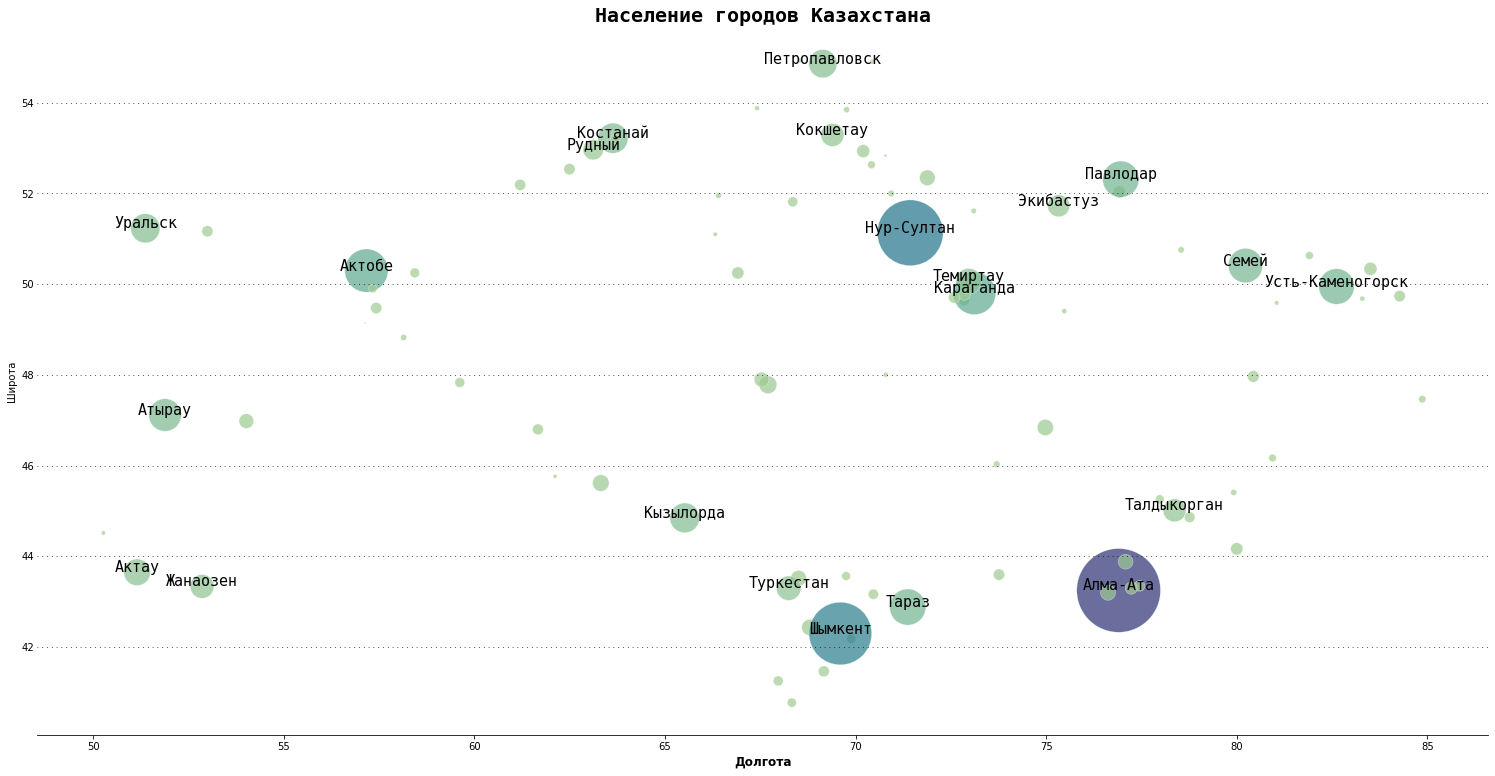

In [106]:
fig = plt.figure(figsize=(26, 13), facecolor='white')
gs=fig.add_gridspec(1,1)
ax=[None]

ax[0]=fig.add_subplot(gs[0,0])

ax[0].grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sns.scatterplot(
    data=cities,
    x='lon',
    y='lat',
    size='current_pop',
    sizes=(1, 7000),
    legend=False,
    hue='current_pop',
    palette='crest',
    alpha=0.7
)

for direction in ['top','right','left']:
    ax[0].spines[direction].set_visible(False)

ax[0].set_xlabel('Долгота',fontsize=12, fontweight='bold')


ax[0].tick_params(axis='y',length=0)
ax[0].set_ylabel('Широта')
ax[0].set_title('Население городов Казахстана', fontsize=20, fontweight='bold', fontfamily='monospace')

for i in range(len(cities)):
    if cities.iloc[i, 16] >= 100000:
        plt.annotate(
            cities.iloc[i, 0],
            xy=(cities.iloc[i, 18], cities.iloc[i, 17]),
            xytext=(cities.iloc[i, 18], cities.iloc[i, 17]),
            fontsize=15,
            fontfamily='monospace',
            fontweight='light',
            ha='center',
            color='black'
        )

plt.show()

In [110]:
cities.to_csv('kz_cities.csv', header=True, index=False, encoding='utf-8-sig')